In [ ]:
!pip install catboost

In [ ]:
!pip install pycaret

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [ ]:
# 자체 점수 : 0.701
# 제출 점수(제출 날짜) : 0(2022-01-19 15:10:46)

# 설정

In [ ]:
# pycaret : blend(cat/tuned_lgbm)
# probability_threshold : best

# combine
# 순서형 특성 수치형으로 지정(4개) : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [ ]:
# 8개 특성 제거
# 'id',
# 'contents_open_dt' 
# 'person_prefer_f',
# 'person_prefer_g'
# 'contents_rn', 
# 'h_m_match_yn',
# 'h_s_match_yn',
# 'contents_attribute_k'

In [ ]:
# 차이가 비교적 많이 나는 특성(25+1개)만 훈련/예측 : ⭕

# d_l_match_yn
# d_m_match_yn
# d_s_match_yn

# h_l_match_yn

# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c

# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3

# person_prefer_e

# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
##############################
# contents_attribute_i
# contents_attribute_a

# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c

# contents_attribute_l
# contents_attribute_d

# contents_attribute_m
# contents_attribute_e

# contents_attribute_h
##############################
# person_rn

# 데이터 불러오기

In [ ]:
# train = pd.read_csv('../data/train.csv')
# test = pd.read_csv('../data/test.csv')
train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/test.csv')

# 데이터 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [ ]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [ ]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [ ]:
test_col = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
 'person_prefer_e',
 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 
 'contents_attribute_i', 'contents_attribute_a',
 'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
 'contents_attribute_l', 'contents_attribute_d',
 'contents_attribute_m', 'contents_attribute_e',
 'contents_attribute_h',
 'person_rn']
target = ['target']
train_col = test_col + target
len(train_col), len(test_col)

(27, 26)

In [ ]:
train = train[train_col]
test = test[test_col]

## 훈련에 의미가 적은 열 제거

In [ ]:
# train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn'], axis=1) 
# test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn'], axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   person_attribute_a      501951 non-null  int64
 5   person_attribute_a_1    501951 non-null  int64
 6   person_attribute_b      501951 non-null  int64
 7   person_prefer_c         501951 non-null  int64
 8   person_prefer_d_1       501951 non-null  int64
 9   person_prefer_d_2       501951 non-null  int64
 10  person_prefer_d_3       501951 non-null  int64
 11  person_prefer_e         501951 non-null  int64
 12  person_prefer_h_1       501951 non-null  int64
 13  person_prefer_h_2       501951 non-null  int64
 14  person_prefer_h_3       501951 non-null  int64
 15  

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   person_attribute_a      46404 non-null  int64
 5   person_attribute_a_1    46404 non-null  int64
 6   person_attribute_b      46404 non-null  int64
 7   person_prefer_c         46404 non-null  int64
 8   person_prefer_d_1       46404 non-null  int64
 9   person_prefer_d_2       46404 non-null  int64
 10  person_prefer_d_3       46404 non-null  int64
 11  person_prefer_e         46404 non-null  int64
 12  person_prefer_h_1       46404 non-null  int64
 13  person_prefer_h_2       46404 non-null  int64
 14  person_prefer_h_3       46404 non-null  int64
 15  contents_attribute_

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [ ]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,target
0,True,True,True,False,1,4,3,5,275,370,369,8,4,95,59,3,3,2,10,1,1608,275,1,4,139,618822,1
1,False,False,False,True,1,3,4,1,114,181,175,4,131,101,96,1,3,1,5,1,1608,275,1,4,133,571659,0
2,False,False,False,True,2,0,3,5,464,175,452,3,54,263,56,3,1,2,10,1,1600,94,1,4,53,399816,0
3,False,False,False,True,2,0,2,5,703,705,704,3,72,227,2,1,3,1,5,1,1608,275,5,3,74,827967,0
4,True,True,True,False,1,3,4,5,275,370,369,4,214,210,209,1,1,2,10,1,1608,275,1,4,74,831614,0


In [ ]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn
0,True,False,False,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,2,10,1,1147,839,1,5,263,393790
1,False,False,False,True,2,0,2,2,683,1086,662,2,258,263,49,1,3,1,5,1,1611,278,1,4,263,394058
2,True,False,False,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,1,3,1,1817,490,3,4,177,1002061
3,True,False,False,True,1,2,2,5,114,181,175,4,177,170,171,3,3,1,5,1,101,150,5,3,177,1000813
4,True,False,False,True,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,1,5,1,985,1097,1,4,177,111146


# 모델 훈련/예측

In [ ]:
# 순서형 특성 수치형으로 지정(4개) : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [ ]:
num_f = ['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']

In [ ]:
ex = setup(train, target='target', n_jobs=-1, use_gpu=True,
           session_id=0, verbose=True, silent=True, 
           fold=5, fold_shuffle=True, combine_rare_levels=True, 
           numeric_features=num_f, data_split_stratify=True
           )

,Description,Value
0,session_id,0
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(501951, 27)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# 모델 생성1
model1 = create_model('catboost')
# 1m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6127,0.6573,0.6616,0.6024,0.6306,0.2254,0.2265
1,0.6101,0.6548,0.6604,0.5999,0.6287,0.2203,0.2215
2,0.6126,0.6595,0.6632,0.6020,0.6311,0.2252,0.2264
3,0.6070,0.6526,0.6577,0.5969,0.6258,0.2140,0.2151
4,0.6068,0.6526,0.6555,0.5971,0.6249,0.2136,0.2146
Mean,0.6098,0.6554,0.6597,0.5997,0.6282,0.2197,0.2208
SD,0.0026,0.0027,0.0028,0.0023,0.0025,0.0052,0.0052


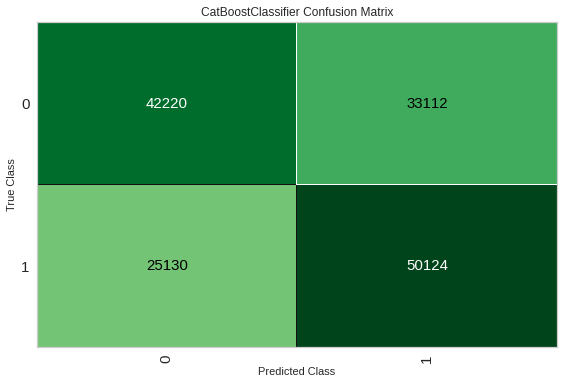

In [ ]:
plot_model(model1, plot='confusion_matrix')

In [ ]:
# 모델 생성2
model2 = create_model('lightgbm')
# 36s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6142,0.6601,0.6721,0.6022,0.6352,0.2285,0.2301
1,0.6130,0.6576,0.6718,0.6009,0.6344,0.2260,0.2276
2,0.6141,0.6615,0.6759,0.6014,0.6364,0.2283,0.2301
3,0.6108,0.6563,0.6717,0.5986,0.6330,0.2217,0.2234
4,0.6085,0.6555,0.6637,0.5976,0.6289,0.2171,0.2185
Mean,0.6122,0.6582,0.6710,0.6001,0.6336,0.2244,0.2259
SD,0.0022,0.0023,0.0040,0.0017,0.0026,0.0044,0.0045


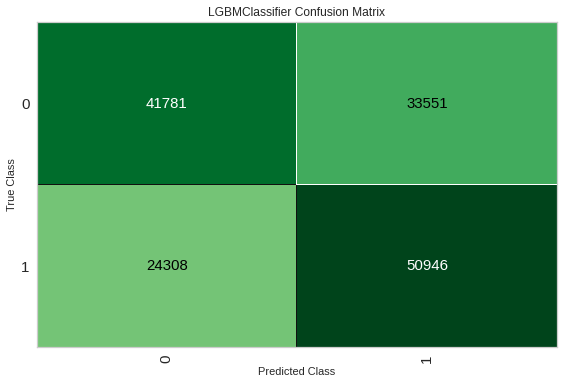

In [ ]:
plot_model(model2, plot='confusion_matrix')

In [ ]:
# tune model
tuned_model2 = tune_model(model2, optimize='F1', early_stopping=True)
# 8m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6254,0.6733,0.6704,0.6148,0.6414,0.2508,0.2519
1,0.6236,0.6709,0.6720,0.6125,0.6409,0.2473,0.2485
2,0.6239,0.6732,0.6702,0.6132,0.6404,0.2479,0.2490
3,0.6209,0.6689,0.6687,0.6101,0.6380,0.2417,0.2429
4,0.6209,0.6696,0.6664,0.6106,0.6373,0.2418,0.2429
Mean,0.6229,0.6712,0.6695,0.6122,0.6396,0.2459,0.2470
SD,0.0018,0.0018,0.0019,0.0017,0.0016,0.0036,0.0036


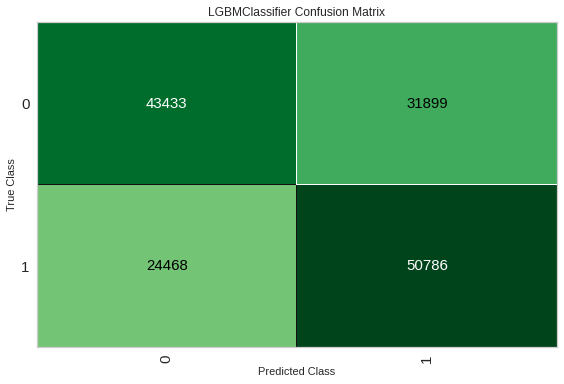

In [ ]:
plot_model(tuned_model2, plot='confusion_matrix')

In [ ]:
# blend
blended_model = blend_models([model1, model2], optimize='F1', method='soft')
# 2m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6150,0.6600,0.6686,0.6037,0.6345,0.2301,0.2314
1,0.6127,0.6575,0.6674,0.6014,0.6326,0.2254,0.2268
2,0.6145,0.6618,0.6711,0.6027,0.6351,0.2291,0.2306
3,0.6101,0.6557,0.6654,0.5989,0.6304,0.2203,0.2216
4,0.6094,0.6552,0.6607,0.5990,0.6283,0.2188,0.2200
Mean,0.6123,0.6581,0.6667,0.6011,0.6322,0.2247,0.2261
SD,0.0023,0.0025,0.0035,0.0019,0.0025,0.0046,0.0046


In [ ]:
# optimize threshold for trained model
best_thr1 = optimize_threshold(blended_model, optimize='F1')
best_thr1
# 26m

CustomProbabilityThresholdClassifier(classifier=VotingClassifier(estimators=[('catboost',
                                                                              <catboost.core.CatBoostClassifier object at 0x7ff489507990>),
                                                                             ('lightgbm',
                                                                              LGBMClassifier(boosting_type='gbdt',
                                                                                             class_weight=None,
                                                                                             colsample_bytree=1.0,
                                                                                             importance_type='split',
                                                                                             learning_rate=0.1,
                                                                                             max_depth=-1,
 

In [ ]:
# blend
blended_model2 = blend_models([model1, tuned_model2], optimize='F1', method='soft')
# 2m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6247,0.6725,0.6738,0.6133,0.6421,0.2494,0.2506
1,0.6228,0.6699,0.6746,0.6110,0.6412,0.2456,0.2469
2,0.6249,0.6732,0.6763,0.6131,0.6432,0.2499,0.2513
3,0.6196,0.6676,0.6705,0.6083,0.6379,0.2392,0.2405
4,0.6188,0.6679,0.6682,0.6079,0.6366,0.2377,0.2389
Mean,0.6222,0.6702,0.6727,0.6107,0.6402,0.2444,0.2456
SD,0.0025,0.0023,0.0029,0.0023,0.0025,0.0051,0.0051


In [ ]:
# optimize threshold for trained model
best_thr2 = optimize_threshold(blended_model2, optimize='F1')
best_thr2
# 31m

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

CustomProbabilityThresholdClassifier(classifier=VotingClassifier(estimators=[('catboost',
                                                                              <catboost.core.CatBoostClassifier object at 0x7ff49c1f3810>),
                                                                             ('lightgbm',
                                                                              LGBMClassifier(bagging_fraction=0.8,
                                                                                             bagging_freq=1,
                                                                                             boosting_type='gbdt',
                                                                                             class_weight=None,
                                                                                             colsample_bytree=1.0,
                                                                                             feature_fraction=0.8,

## train 예측, F1 자체평가

In [ ]:
# th = 0.2932

In [ ]:
# train예측
train_pred = predict_model(best_thr1, train)

In [ ]:
from pycaret.utils import check_metric
check_metric(train['target'], train_pred['Label'], metric = 'F1')

0.688

In [ ]:
# th2 = 0.2982

In [ ]:
# train예측
train_pred2 = predict_model(best_thr2, train)

In [ ]:
check_metric(train['target'], train_pred2['Label'], metric = 'F1')

0.701

## test 예측

In [ ]:
# 예측
pred = predict_model(best_thr2, test)

In [ ]:
pred['Label'].value_counts()

1    36205
0    10199
Name: Label, dtype: int64

# 제출파일 불러오기

In [ ]:
# sub = pd.read_csv('../data/sample_submission.csv')
sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


# 제출파일 생성

In [ ]:
file_ver = '5.3'
# sub.to_csv(f'sub_ver{file_ver}.csv', index=False)
sub.to_csv(f'/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver{file_ver}.csv', index=False)

# 코드 마지막